### Import all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,9/25/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,11/20/2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,7/1/2019,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,11/1/2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,1/11/2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,3/2/2019,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

## Data Cleaning

#### Missing Values

In [10]:
df["director"].fillna("Unknown",inplace=True)

In [11]:
df["country"].fillna(df["country"].mode()[0],inplace=True)

In [12]:
df["date_added"].fillna(method="ffill",inplace=True)

In [13]:
df["rating"].fillna(df["rating"].mode()[0],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Check Duplications

In [15]:
df.duplicated().sum()

0

#### Check Outliers

In [16]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


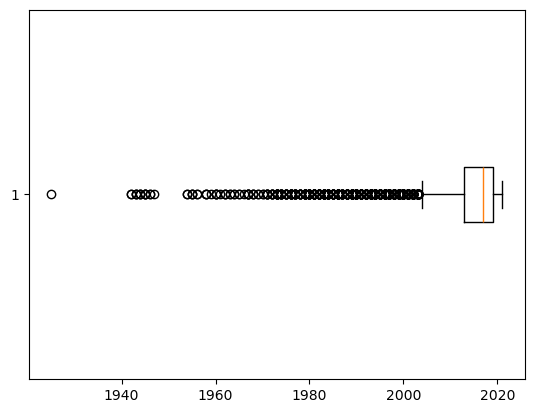

In [17]:
plt.boxplot(x=df["release_year"],vert=False);

#### Drop Outliers Data

In [18]:
Min , High = df["release_year"].quantile([0.1,0.9])

In [19]:
remove_outliers = df["release_year"].between(Min,High)

In [20]:
df = df[remove_outliers]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7352 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7352 non-null   object
 1   type          7352 non-null   object
 2   title         7352 non-null   object
 3   director      7352 non-null   object
 4   cast          6647 non-null   object
 5   country       7352 non-null   object
 6   date_added    7352 non-null   object
 7   release_year  7352 non-null   int64 
 8   rating        7352 non-null   object
 9   duration      7349 non-null   object
 10  listed_in     7352 non-null   object
 11  description   7352 non-null   object
dtypes: int64(1), object(11)
memory usage: 746.7+ KB


#### Drop Unnessessary Features

In [22]:
df.drop(columns=["duration","cast","description"],inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7352 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7352 non-null   object
 1   type          7352 non-null   object
 2   title         7352 non-null   object
 3   director      7352 non-null   object
 4   country       7352 non-null   object
 5   date_added    7352 non-null   object
 6   release_year  7352 non-null   int64 
 7   rating        7352 non-null   object
 8   listed_in     7352 non-null   object
dtypes: int64(1), object(8)
memory usage: 574.4+ KB


#### Replace all values in feature "rating" with new values

In [24]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'R', 'TV-PG', 'TV-G', 'TV-Y',
       'PG', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', 'TV-Y7-FV',
       'UR'], dtype=object)

In [25]:
df["rating"] = df["rating"].replace({"G":"All Ages","PG":"Parental Guidance","PG-13":"Teens & Up (13+)","R":"Restricted (17+)","NC-17"
                                     :"Adults Only (18+)","TV-Y":"Kids (All Ages)","TV-Y7":"Kids (7+)","TV-G":"General Audience",
                                     "TV-PG":"Parental Caution","TV-14":"Teen & Up (14+)","TV-MA":"Mature Audience (18+)"})

In [26]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,Teens & Up (13+),Documentaries
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",United States,9/22/2021,2020,Mature Audience (18+),"Documentaries, International Movies"
17,s18,TV Show,Falsa identidad,Unknown,Mexico,9/22/2021,2020,Mature Audience (18+),"Crime TV Shows, Spanish-Language TV Shows, TV ..."
21,s22,TV Show,Resurrection: Ertugrul,Unknown,Turkey,9/22/2021,2018,Teen & Up (14+),"International TV Shows, TV Action & Adventure,..."
27,s28,Movie,Grown Ups,Dennis Dugan,United States,9/20/2021,2010,Teens & Up (13+),Comedies


#### Rename specific features

In [27]:
df.rename(columns={"rating":"age category","listed_in":"film_genre"},inplace=True)

### Save all changes in new CSV File

In [28]:
df.to_csv("Cleaned_Netflix.csv",index=False)